# **Part I Assignment: Backpropagation**

**Objective**: To train a simple neural network by implementing the backpropagation algorithm from scratch.

#STUDENT 1: Daniel Lillo Plaza
#STUDENT 2: Carlos Blom-Dahl Ramos

#INSTRUCTIONS:#
You ONLY have to modify the code from the sections:

*   **STUDENT: FUNCTIONS TO COMPLETE**
*   **STUDENT: EQUIVALENT KERAS MODEL AND TRAINING**

The rest of the code generates the code


This is the network architecture that we are going to build:

<img src="https://drive.google.com/uc?export=view&id=101UH3h8N-LxH4m1UG3bry6LSEHHjZtbB"
     alt="Markdown Monster icon"
     width="750" height="200"
     style="float: left; margin-right: 10px;" />


Define arrays at the different stages of the network as follows:

* w0: contains weights connecting input and first layer: $w_0$, $w_1$, $w_2$, $w_3$.
* s0: contains output from the first linear block: $s_0[0]$, $s_0[1]$.
* z0: contains output from the first non-linear block: $z_0[0]$, $z_0[1]$.
* w1: contains weights at the second layer: $w_4$, $w_5$.
* s1: contains output from the second linear block: $s_1[0]$.
* yp: contains output: $\hat{y}$.

In [25]:
# These are the only packages to be used:
import numpy as np
import matplotlib.pyplot as plt

## **STUDENT: Functions to Complete:**

In [26]:
# Define activation/loss functions and derivatives

def sigmoid(x):
  '''Sigmoid Function'''
  out = 1/(1+np.exp(-x))
  return out

def d_sigmoid(x):
  '''Derivative of Sigmoid Function'''
  s = sigmoid(x)
  out = s*(1-s)
  return out

def bin_ce_loss(y,yp):
  '''Binary Cross-Entropy Loss
  
  Inputs:
    y: ground truth output.
    yp: predicted output.
  '''
  out = -(y*np.log(yp)+(1-y)*np.log(1-yp))
  return out

def d_bin_ce_loss(y,yp):
  '''Derivative of Binary Cross-Entropy Loss
  
    Inputs:
    y: ground truth output.
    yp: predicted output.
  '''
  out = -(y/yp - (1-y)/(1-yp))
  return out

def acc(y, yp):
  '''Accuracy for a single example.
  
    Inputs:
    y: ground truth output.
    yp: predicted output.

    Outputs:
    returns 1 if the predicted class for yp is the same as y, and 0 otherwise.
  
  '''
  out = y == (yp >= 0.5)
  return out

In [27]:
def forward(x,y,w0,w1):
  '''Forward Step
  
  Inputs:
    x: input data array of dim (2,).
    y: ground-truth output.
    w0: weights from first layer with dimension (4,).
    w1: weights from second layer with dimension (2,).

  Outputs:
    s0: output from the first linear block.
    z0: output from the first non-linear block.
    s1: output from the second linear block.
    yp: prediction.
  '''

  s0 = np.dot(np.reshape(w0,(2, 2)), x)
  z0 = sigmoid(s0)
  s1 = np.dot(w1.T, z0)
  yp = sigmoid(s1)
  return s0, z0, s1, yp

def compute_loss(y,yp): 
  '''Loss Computation
  
  Inputs:
    y: prediction.
    yp: ground-truth output.
  ''' 

  loss = bin_ce_loss(y,yp)
  return loss

def backprop(x,y,yp,s1,z0,s0,w1,w0,lr):
  '''Backpropagation.

  Inputs:
    x: input data array of dim (2,).
    y: ground-truth output.
    yp: prediction.
    s1: output from the second linear block.
    z0: output from the first non-linear block.
    s0: output from the first linear block.
    w1: weights from second layer with dimension (2,).
    w0: weights from first layer with dimension (4,).
    lr: learning rate.

  Outputs:
    w0: w0 updated.
    w1: w1 updated.
    
  '''
  dC_dyp = d_bin_ce_loss(y, yp)
  dC_ds1 = dC_dyp * d_sigmoid(s1)
  dC_dw1 = dC_ds1 * z0

  dC_dz0 = dC_ds1 * w1
  dC_ds0 = dC_dz0 * d_sigmoid(s0)
  dC_dw0 = np.array([dC_ds0[0],dC_ds0[0],dC_ds0[1],dC_ds0[1]]) * np.array([x[0],x[1],x[0],x[1]])

  w1 = w1 - lr * dC_dw1
  w0 = w0 - lr * dC_dw0
  return  w0, w1  

## **DO NOT CHANGE**: Data Generation:
Data points are synthetically created according to two different distributions, one centered at [0.3, 0.3] and the other at [0.8, 0.8].

**Note:** You don't need to change code in this section (we don't want to modify the random seed or data generation process).



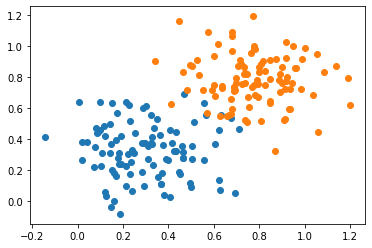

In [28]:
np.random.seed(0)

# Number of data examples per class 
N = 100

# Data from class 0
x_data_0 = np.sqrt(0.03)*np.random.randn(N,2) + 0.3
y_data_0 = np.zeros((N,))

# Data from class 1
x_data_1 = np.sqrt(0.03)*np.random.randn(N,2) + 0.8
y_data_1 = np.ones((N,))

plt.scatter(x_data_0[:,0], x_data_0[:,1])
plt.scatter(x_data_1[:,0], x_data_1[:,1])

In [29]:
# Join all data and get training and test splits
x_data = np.vstack((x_data_0, x_data_1))
y_data = np.hstack((y_data_0, y_data_1))

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=10)

## **DO NOT CHANGE:** Network Training:

Train the network for multiple epochs using **Stochastic Gradient Descent** (weights are updated for each training example).

**Note:** You don't need to change code in this section.

In [30]:
# Set the network initial state as follows:
w0 = np.array([0.15, 0.20, 0.25, 0.30])
w1 = np.array([0.40, 0.50])
print('Shape of weights:', w0.shape, w1.shape)

Shape of weights: (4,) (2,)


In [31]:
n_epochs = 300
lr = 0.1
loss_history=[]
mse_history=[]
acc_history=[]
for epoch in range(n_epochs):
  print("Epoch: {}".format(epoch+1))
  loss_step=[]
  mse_step=[]
  acc_step=[]
  for (x,y) in zip(x_train, y_train):
    s0, z0, s1, yp = forward(x, y, w0, w1)
    step_loss = compute_loss(y,yp)
    w0, w1 = backprop(x,y,yp,s1,z0,s0,w1,w0,lr)
    # Calculate loss and metrics for this step:
    loss_step.append(step_loss)
    mse_step.append((yp-y)**2)
    acc_step.append(acc(y,yp))
  
  # Calculate average loss and metrics over the training step at this epoch:

  loss_epoch = np.mean(np.array(loss_step))
  mse_epoch = np.mean(np.array(mse_step))
  acc_epoch = np.mean(np.array(acc_step))
  print('loss: {:.4f}, mse: {:.4f}, acc: {:.4f}'.format(loss_epoch, mse_epoch, acc_epoch))
  
  loss_history.append(loss_epoch)
  mse_history.append(mse_epoch)    
  acc_history.append(acc_epoch)

Epoch: 1
loss: 0.7008, mse: 0.2538, acc: 0.5062
Epoch: 2
loss: 0.6956, mse: 0.2512, acc: 0.5000
Epoch: 3
loss: 0.6938, mse: 0.2503, acc: 0.5062
Epoch: 4
loss: 0.6903, mse: 0.2486, acc: 0.5188
Epoch: 5
loss: 0.6825, mse: 0.2448, acc: 0.5188
Epoch: 6
loss: 0.6649, mse: 0.2361, acc: 0.5312
Epoch: 7
loss: 0.6313, mse: 0.2196, acc: 0.6687
Epoch: 8
loss: 0.5872, mse: 0.1980, acc: 0.7875
Epoch: 9
loss: 0.5454, mse: 0.1779, acc: 0.8500
Epoch: 10
loss: 0.5102, mse: 0.1613, acc: 0.9125
Epoch: 11
loss: 0.4804, mse: 0.1476, acc: 0.9313
Epoch: 12
loss: 0.4548, mse: 0.1361, acc: 0.9437
Epoch: 13
loss: 0.4323, mse: 0.1263, acc: 0.9563
Epoch: 14
loss: 0.4125, mse: 0.1179, acc: 0.9563
Epoch: 15
loss: 0.3947, mse: 0.1107, acc: 0.9563
Epoch: 16
loss: 0.3788, mse: 0.1043, acc: 0.9563
Epoch: 17
loss: 0.3645, mse: 0.0987, acc: 0.9563
Epoch: 18
loss: 0.3515, mse: 0.0938, acc: 0.9563
Epoch: 19
loss: 0.3397, mse: 0.0894, acc: 0.9563
Epoch: 20
loss: 0.3288, mse: 0.0855, acc: 0.9563
Epoch: 21
loss: 0.3189, mse: 

Final w0: [-1.25973606 -1.54859502  0.9728002   1.42796721]
Final w1: [-32.15462486   7.49679762]


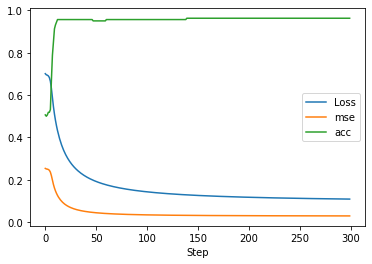

In [32]:
plt.plot(loss_history);
plt.plot(mse_history);
plt.plot(acc_history);
plt.xlabel('Step')
plt.legend(['Loss', 'mse', 'acc'])

print('Final w0: {}'.format(w0))
print('Final w1: {}'.format(w1))



Compute metrics over test data:

In [33]:
# Predict over test data:
pred = []
loss_ex = []
mse_ex = []
acc_ex = []
for (x,y) in zip(x_test, y_test):
  _, _, _, yp = forward(x, y, w0, w1)
  pred.append(yp)

  # Calculate loss and metrics for this example:
  loss_ex.append(step_loss)
  mse_ex.append((yp-y)**2)
  acc_ex.append(acc(y,yp))

test_loss = np.mean(np.array(loss_ex))
test_mse  = np.mean(np.array(mse_ex))
test_acc  = np.mean(np.array(acc_ex))

print('Test loss: ', test_loss)
print('Test mse: ', test_mse)
print('Test acc: ', test_acc)

Test loss:  0.002418066031365423
Test mse:  0.02843829770809785
Test acc:  0.975


# With Keras/Tensorflow:

Now you need to set up exactly the same network as before with the same initial state. Train the network with the same parameters and data as before, so that the result in each training step provided by Keras is the same.

**Note:** Please, note that nodes in our network were defined without bias parameters.

In [34]:
import tensorflow as tf

# **STUDENT: Equivalent Keras Model and Training**

In [35]:
# Define the Keras model:
inputs = tf.keras.Input(shape=(2,))

x = tf.keras.layers.Dense(2,use_bias=False)(inputs)
x = tf.keras.layers.Activation(activation='sigmoid')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid', use_bias=False)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="MLP_model")





DO NOT CHANGE the following section, as it already sets the initial state of the model manually.

In [36]:
# Set the network state:
w0 = np.array([[0.15, 0.25], [0.20, 0.30]])
w1 = np.array([[0.40], [0.50]])
model.layers[1].set_weights([w0])
model.layers[3].set_weights([w1])

# We check that the above initial weights have been actually updated in the model.
for l in model.layers:
  if len(l.get_weights()) > 0:
    print(l.get_weights())


[array([[0.15, 0.25],
       [0.2 , 0.3 ]], dtype=float32)]
[array([[0.4],
       [0.5]], dtype=float32)]


In [37]:
# Compile the model with the same optimizer parameter and metrics

model.compile(optimizer=tf.keras.optimizers.SGD(
    learning_rate=lr,
    momentum=0.0),
              loss='binary_crossentropy',
              metrics=['MSE','accuracy'])


In [38]:
# Fit the model for same epochs (set shuffle=False and remember to use a batch size of 1):

history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=1,shuffle=False)

Epoch 1/300
160/160 [==============================] - 1s 1ms/step - loss: 0.7008 - MSE: 0.2538 - accuracy: 0.5063
Epoch 2/300
160/160 [==============================] - 0s 1ms/step - loss: 0.6956 - MSE: 0.2512 - accuracy: 0.5000
Epoch 3/300
160/160 [==============================] - 0s 1ms/step - loss: 0.6938 - MSE: 0.2503 - accuracy: 0.5063
Epoch 4/300
160/160 [==============================] - 0s 2ms/step - loss: 0.6903 - MSE: 0.2486 - accuracy: 0.5188
Epoch 5/300
160/160 [==============================] - 0s 2ms/step - loss: 0.6825 - MSE: 0.2448 - accuracy: 0.5188
Epoch 6/300
160/160 [==============================] - 0s 2ms/step - loss: 0.6649 - MSE: 0.2361 - accuracy: 0.5312
Epoch 7/300
160/160 [==============================] - 0s 1ms/step - loss: 0.6313 - MSE: 0.2196 - accuracy: 0.6687
Epoch 8/300
160/160 [==============================] - 0s 1ms/step - loss: 0.5872 - MSE: 0.1980 - accuracy: 0.7875
Epoch 9/300
160/160 [==============================] - 0s 1ms/step - loss: 0.545

Text(0.5, 1.0, 'Scratch model')

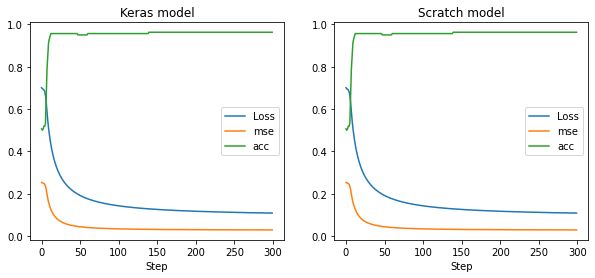

In [40]:
# Print the history loss and metrics and compare the results with the network implemented from scratch.
loss_history_keras = history.history['loss']
mse_history_keras = history.history['MSE']
acc_history_keras = history.history['accuracy']

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(loss_history_keras)
plt.plot(mse_history_keras)
plt.plot(acc_history_keras)
plt.xlabel('Step')
plt.legend(['Loss', 'mse', 'acc'])
plt.title("Keras model")

plt.subplot(1,2,2)
plt.plot(loss_history)
plt.plot(mse_history)
plt.plot(acc_history)
plt.xlabel('Step')
plt.legend(['Loss', 'mse', 'acc'])
plt.title("Scratch model")

In [41]:
# Check the final value of the model weights:

print('Final w0: {}'.format(model.layers[1].get_weights()))
print('Final w1: {}'.format(model.layers[3].get_weights()))

Final w0: [array([[-1.2597386,  0.9727972],
       [-1.5485965,  1.4279673]], dtype=float32)]
Final w1: [array([[-32.154697 ],
       [  7.4968023]], dtype=float32)]
